In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


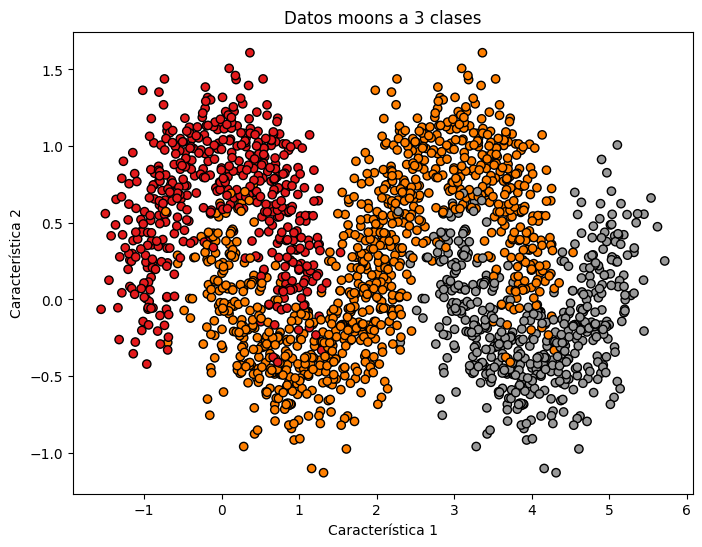

In [ ]:
# Datos sintéticos de make_moons (2 clases)
X1, y1 = make_moons(n_samples=1000, noise=0.25, random_state=42)
X2, y2 = make_moons(n_samples=1000, noise=0.25, random_state=42)

# Crear tercera clase recorriendo coordenadas para la mitad de los datos y creando nueva etiqueta
X2[:, 0] += 3  # aplicar un desplazamiento en eje x
y2 = y2 + 1    # asignar nueva etiqueta

# Combinar los datos
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Representación one-hot
one_hot_encoder = OneHotEncoder(sparse=False)
y_onehot = one_hot_encoder.fit_transform(y.reshape(-1, 1))

# Visualización inicial
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title('Datos moons a 3 clases')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Estandarizar datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definir conjuntos de prueba y de entrenamiento
X_train, _, y_train, _= train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y)

## Propagación hacia adelante

In [ ]:
# Definimos los pesos iniciales y valores del bias
w1 = np.random.random(size = (2, 8))
w2 = np.random.random(size = (8, 8))
w3 = np.random.random(size = (8, 3))

b1 = np.random.random(size = 8)
b2 = np.random.random(size = 8)

In [ ]:
# Esta función nos va a permitir calcular los valores de cada uno de los z's
def z(w, X, bias):
  return X @ w + bias

In [ ]:
z(w1, X_train, b1)

array([[ 0.45833295,  0.12332191,  0.36093903, ...,  0.50877964,
         1.28269547,  0.66270609],
       [ 2.0534645 ,  0.76994578,  1.79604917, ...,  0.77218228,
         1.22970397,  2.00299844],
       [-0.25411053, -0.90563331, -1.93349643, ..., -0.82531415,
         0.55083717, -1.19808208],
       ...,
       [ 0.83222076, -0.38477307, -0.77633208, ..., -0.51364179,
         0.59691105, -0.14804468],
       [ 0.52599995, -0.38159504, -0.767424  , ..., -0.35496862,
         0.73704065, -0.18824073],
       [ 0.36488507, -0.03985863, -0.00304761, ...,  0.28741718,
         1.15789752,  0.37051671]])

Esta función se puede utilizar en general, ya que va a realizar la operación:
$$z = \Sigma_i  w^T \cdot x$$
La cual se utiliza nuevamente para las demás capas después de aplicar la función de activación

In [ ]:
# Es la función relu que se aplica a la primera capa oculta
def relu(capa):
  return np.maximum(0, capa)

Recordamos que la función ReLU es la siguiente:
$$ ReLU = max\{z, 0\} $$
Por lo que la función anterior va a ver si el valor asociado a la neurona es mayor a cero, si es el caso contrario dicho valor se sustituye por cero.

In [ ]:
# La segunda función que se va a aplicar (en este caso tanh)
def tanh(capa):
  return np.tanh(capa)

Finalmente, se tiene la función tanh, la cual va a obtener la tanh del valor asociado a cada neurona de la segunda capa (después de haber hecho las operaciones correspondientes para llegar a esa segunda capa)

In [ ]:
def PropagacionHaciaAdelante(w1, w2, w3, X, b1, b2):
  C1 = relu(z(w1, X, b1))         # Primera capa oculta
  C2 = tanh(z(w2, C1, b2))        # Segunda capa oculta
  Y_salida = z(w3, C2, 0)         # Valores de salida
  return C1, C2, Y_salida

In [ ]:
C1,C2,Y_salida = PropagacionHaciaAdelante(w1,w2,w3,X_train, b1, b2)
print(Y_salida)  # Se muestran los valores de clasificación para cada entrada
 # (al ejecutarse por primera vez dichos valores son muy malos respecto a los originales)

[[1.93022758 3.91255593 2.85891374]
 [2.04935832 4.16140559 3.07075801]
 [0.91371893 1.911547   1.35151829]
 ...
 [1.60717174 3.32892906 2.46660248]
 [1.31257851 2.74401608 2.01374933]
 [1.68540472 3.48148364 2.5343492 ]]


Explicación del código anterior:

La salida es un arreglo en el que se encuentran las 3 salidas correspondientes a la red, la función **"PropagacionHaciaAdelante"** recibe como argumentos unicamente las entradas iniciales (en este caso el vector X), y los pesos correspondientes a cada una de las capas (w1, w2, w3), además del bias, e internamente realiza las operaciones para la primera capa con la función de activación correspondiente y para la segunda capa con su función correspondiente.

## Retropropagación

Recordemos la función de perdida
$$ L = \frac{1}{2n} Σ_i (y_{real} - y_{estimado})^2  $$

In [ ]:
def FuncionDePerdida(Y_salida, y_train):
  perdida = (1/(2*3)) * np.sum((y_train - Y_salida)**2, axis = 1)
  return perdida

In [ ]:
FuncionDePerdida(Y_salida, y_train) # Son los valores de perdida asociados a cada salida

array([3.74823879, 3.93731827, 0.58206698, ..., 2.34850656, 1.94708599,
       2.88592415])

In [ ]:
def derivada_relu(capa):
  return np.where(capa > 0, 1, 0)

In [ ]:
def derivada_tanh(capa):
  return 1 - np.tanh(capa)**2

In [ ]:
def derivada_perdida(Y_salida, y_train):
  error = (1/len(Y_salida))*(Y_salida - y_train)
  return error

In [ ]:
derivada_relu(z(w1, X_train, b1))

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 1]])

In [ ]:
derivada_perdida(Y_salida, y_train)

array([[0.00137873, 0.00279468, 0.0013278 ],
       [0.00146383, 0.00225815, 0.0021934 ],
       [0.00065266, 0.0006511 , 0.00096537],
       ...,
       [0.00114798, 0.00166352, 0.00176186],
       [0.00022327, 0.00196001, 0.00143839],
       [0.00120386, 0.00248677, 0.00109596]])

Ahora, para el algoritmo de retropropagación, recordamos que el ajuste de los pesos va a estar dado por:
$$ w_{ij} = w_{ij} - \eta \cdot \frac{dL}{dw_{ij}}$$

In [ ]:
def backpropagation(X_train, y_train, w1, w2, w3, b1, b2, eta):
  C1, C2, Y_salida = PropagacionHaciaAdelante(w1, w2, w3, X_train, b1, b2)

  dL_dY = derivada_perdida(Y_salida, y_train)

  dY_dW3 = C2.T @ dL_dY
  dY_dC2 = dL_dY @ w3.T

  dC2_dZ2 = derivada_tanh(C2)
  dZ2_dW2 = C1.T @ (dY_dC2 * dC2_dZ2)
  dZ2_dC1 = (dY_dC2 * dC2_dZ2) @ w2.T

  dC1_dZ1 = derivada_relu(C1)
  dZ1_dW1 = X_train.T @ (dZ2_dC1 * dC1_dZ1)

  w3 = w3 - eta * dY_dW3
  w2 = w2 - eta * dZ2_dW2
  w1 = w1 - eta * dZ1_dW1

  return w1, w2, w3, b1, b2

In [ ]:
eta = 0.05 # taza de aprendizaje
backpropagation(X_train, y_train, w1, w2, w3, b1, b2, eta)

(array([[0.27162638, 0.3670386 , 0.89709958, 0.38266795, 0.34198587,
         0.39408338, 0.31246787, 0.7322186 ],
        [0.65257825, 0.33076613, 0.78903977, 0.52337624, 0.71825324,
         0.25208562, 0.05612605, 0.69879828]]),
 array([[ 0.13938891,  0.28585032,  0.35570786,  0.74007742,  0.26344057,
          0.47231773,  0.42118787,  0.27105248],
        [ 0.41499204,  0.13703676,  0.29898919,  0.46200715,  0.81253374,
          0.08584542,  0.13743212,  0.77999492],
        [ 0.50256329,  0.09662004,  0.42378224,  0.71298564,  0.26573172,
         -0.00748986,  0.33495359,  0.26818285],
        [ 0.70509435,  0.87258192,  0.37828147,  0.50335161,  0.81799414,
          0.35646291,  0.2998413 ,  0.0919242 ],
        [ 0.07526168,  0.39587897,  0.36284596,  0.76037716,  0.08041292,
          0.46739655,  0.43435875,  0.40699057],
        [ 0.83230196,  0.77793777,  0.8739904 ,  0.87390532,  0.39063949,
          0.46153478,  0.56645438,  0.63184317],
        [ 0.75112825,  0.58864

Una vez implementado el algoritmo, podemos proceder con el entrenamiento, en este caso, consideremos 1000 epocas para intentar obtener mejores resultados.

Epoca 0, función de perdida: [1.72392845 1.95875182 0.21640973 ... 0.99969976 0.97057642 1.22233268]
Accuracy: 0.5

Epoca 100, función de perdida: [0.1215626  0.06873814 0.06978213 ... 0.07329446 0.15388871 0.1241914 ]
Accuracy: 0.5

Epoca 200, función de perdida: [0.06175515 0.06544873 0.05691324 ... 0.07529624 0.15582058 0.07389143]
Accuracy: 0.6535714285714286

Epoca 300, función de perdida: [0.04069362 0.07222897 0.05008812 ... 0.08890099 0.13911553 0.05421026]
Accuracy: 0.8364285714285714

Epoca 400, función de perdida: [0.04321601 0.07867882 0.04797985 ... 0.10458062 0.13437684 0.05730803]
Accuracy: 0.8278571428571428

Epoca 500, función de perdida: [0.04448214 0.08341513 0.04450774 ... 0.11186427 0.13650351 0.05752877]
Accuracy: 0.8192857142857143

Epoca 600, función de perdida: [0.04384325 0.08756189 0.03945604 ... 0.11185697 0.13875706 0.05374291]
Accuracy: 0.8064285714285714

Epoca 700, función de perdida: [0.03829262 0.08980744 0.03371112 ... 0.11242666 0.13981275 0.0443251 

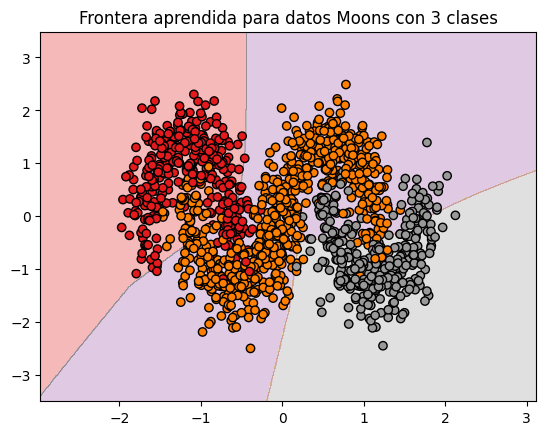

In [ ]:
epocas = 1000
eta = 0.05
perdidas = []

for epoca in range(epocas):
  w1, w2, w3, b1, b2 = backpropagation(X_train, y_train, w1, w2, w3, b1, b2, eta)

  if epoca % 100 == 0 or epoca == 999:
    _, _, Y_salida = PropagacionHaciaAdelante(w1, w2, w3, X_train, b1, b2)
    perdida = FuncionDePerdida(Y_salida, y_train)
    perdidas.append(perdida)
    print(f"Epoca {epoca}, función de perdida: {perdida}")

    predicciones = np.argmax(Y_salida, axis=1)
    y_true = np.argmax(y_train, axis=1)
    accuracy = np.mean(predicciones == y_true)
    print(f"Accuracy: {accuracy}\n")
  accuracy_total = np.mean(predicciones == y_true)

def plot_decision_boundary(X, w1, w2, w3, b1, b2):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  grid = np.c_[xx.ravel(), yy.ravel()]
  C1, C2, Z = PropagacionHaciaAdelante(w1, w2, w3, grid, b1, b2)
  Z = np.argmax(Z, axis = 1).reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha = 0.3, cmap = plt.cm.Set1)
  plt.scatter(X[:, 0], X[:, 1], c = np.argmax(y_train, axis = 1), edgecolor = "k", cmap = plt.cm.Set1)
  plt.title("Frontera aprendida para datos Moons con 3 clases")
  plt.show()

plot_decision_boundary(X_train, w1, w2, w3, b1, b2)

## Segunda Parte

Ahora, es necesario implementar el mismo algoritmo, pero esta vez utilizando la función sigmoide como función de activación de la segunda capa, por lo que debemos añadir dicha función

In [ ]:
# Datos sintéticos de make_moons (2 clases)
X1, y1 = make_moons(n_samples=1000, noise=0.25, random_state=42)
X2, y2 = make_moons(n_samples=1000, noise=0.25, random_state=42)

# Crear tercera clase recorriendo coordenadas para la mitad de los datos y creando nueva etiqueta
X2[:, 0] += 3  # aplicar un desplazamiento en eje x
y2 = y2 + 1    # asignar nueva etiqueta

# Combinar los datos
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Representación one-hot
one_hot_encoder = OneHotEncoder(sparse=False)
y_onehot = one_hot_encoder.fit_transform(y.reshape(-1, 1))

# Estandarizar datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Definir conjuntos de prueba y de entrenamiento
X_train, _, y_train, _= train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Definimos los pesos iniciales y valores del bias
w1 = np.random.random(size = (2, 8))
w2 = np.random.random(size = (8, 8))
w3 = np.random.random(size = (8, 3))

b1 = np.random.random(size = 8)
b2 = np.random.random(size = 8)

La función sigmoide está dada por:
$$ f(x) = \frac{1}{1+e^{-x}} $$

In [ ]:
def sigmoide(capa):
  return 1/(1 + np.exp(-capa))

No es necesario añadir las demás funciones, pues ya se definieron previamente

In [ ]:
def PropagacionHaciaAdelante_02(w1, w2, w3, X, b1, b2):
  C1 = relu(z(w1, X, b1))         # Primera capa oculta
  C2 = sigmoide(z(w2, C1, b2))        # Segunda capa oculta
  Y_salida = z(w3, C2, 0)         # Valores de salida
  return C1, C2, Y_salida

In [ ]:
_,_,Y_salida = PropagacionHaciaAdelante_02(w1, w2, w3, X_train, b1, b2)
Y_salida

array([[4.96020772, 2.11022071, 3.1353689 ],
       [5.15910986, 2.20392065, 3.21342114],
       [3.25668065, 1.37658695, 2.0039567 ],
       ...,
       [3.81379466, 1.59551604, 2.36415648],
       [3.78170907, 1.59411612, 2.34851348],
       [4.7683527 , 2.02736563, 3.03081085]])

In [ ]:
def derivada_sigmoide(capa):
  return sigmoide(capa) * (1 - sigmoide(capa))

In [ ]:
def backpropagation_02(X_train, y_train, w1, w2, w3, b1, b2, eta):
  C1, C2, Y_salida = PropagacionHaciaAdelante_02(w1, w2, w3, X_train, b1, b2)

  dL_dY = derivada_perdida(Y_salida, y_train)

  dY_dW3 = C2.T @ dL_dY
  dY_dC2 = dL_dY @ w3.T

  dC2_dZ2 = derivada_sigmoide(C2)
  dZ2_dW2 = C1.T @ (dY_dC2 * dC2_dZ2)
  dZ2_dC1 = (dY_dC2 * dC2_dZ2) @ w2.T

  dC1_dZ1 = derivada_relu(C1)
  dZ1_dW1 = X_train.T @ (dZ2_dC1 * dC1_dZ1)

  w3 = w3 - eta * dY_dW3
  w2 = w2 - eta * dZ2_dW2
  w1 = w1 - eta * dZ1_dW1

  return w1, w2, w3, b1, b2

In [ ]:
eta = 0.05

backpropagation_02(X_train, y_train, w1, w2, w3, b1, b2, eta)

(array([[0.89510306, 0.44965066, 0.8444849 , 0.88368584, 0.12143128,
         0.75897841, 0.28215697, 0.68701185],
        [0.59369113, 0.25459224, 0.60949819, 0.08213005, 0.50866057,
         0.90870746, 0.54805156, 0.03385926]]),
 array([[-0.03336001,  0.91091193,  0.5628477 ,  0.50534995,  0.41479647,
          0.45217525,  0.66727749, -0.03170338],
        [ 0.57408316,  0.89609609,  0.63266749,  0.65350167,  0.49325351,
          0.77907822,  0.06188316,  0.3364595 ],
        [ 0.29144387,  0.36085641,  0.45806389,  0.00535952,  0.08573818,
          0.3433741 ,  0.90419151,  0.21470209],
        [ 0.27140011,  0.49293584,  0.24798017,  0.67556811,  0.08060793,
          0.21121887,  0.65033812,  0.79515257],
        [ 0.27112988,  0.43350314,  0.83962985,  0.18932876,  0.08816885,
          0.10133233,  0.45562597,  0.19824942],
        [ 0.68333784,  0.03336398,  0.15766989,  0.37415394,  0.40813855,
          0.24451195,  0.65849856,  0.5551552 ],
        [ 0.22500585,  0.45908

Epoca 0, función de perdida: [2.71461343 3.21673863 1.27981672 ... 1.7481852  1.24101685 2.48249789]
Accuracy: 0.25

Epoca 100, función de perdida: [0.11786468 0.05558094 0.07661731 ... 0.07572255 0.13373671 0.11486402]
Accuracy: 0.5

Epoca 200, función de perdida: [0.09229584 0.05382779 0.07254828 ... 0.07379097 0.12721189 0.09381439]
Accuracy: 0.5007142857142857

Epoca 300, función de perdida: [0.04320626 0.04810796 0.06641919 ... 0.0719092  0.11380868 0.05584855]
Accuracy: 0.6707142857142857

Epoca 400, función de perdida: [0.02053755 0.04263448 0.06260765 ... 0.07667009 0.10500516 0.03042118]
Accuracy: 0.6921428571428572

Epoca 500, función de perdida: [0.01635078 0.03920968 0.06054275 ... 0.08553413 0.10230988 0.02394206]
Accuracy: 0.7407142857142858

Epoca 600, función de perdida: [0.01513004 0.03531864 0.05722461 ... 0.09648738 0.09995947 0.02249071]
Accuracy: 0.795

Epoca 700, función de perdida: [0.0143605  0.03012533 0.05305899 ... 0.11170114 0.09698997 0.02184973]
Accuracy: 

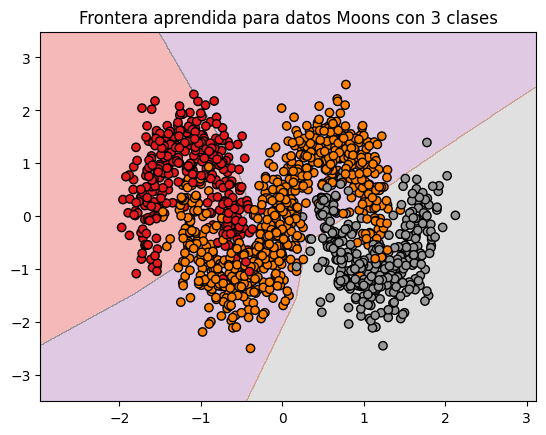

In [ ]:
epocas = 1000
eta = 0.05
perdidas = []

for epoca in range(epocas):
  w1, w2, w3, b1, b2 = backpropagation_02(X_train, y_train, w1, w2, w3, b1, b2, eta)

  if epoca % 100 == 0 or epoca == 999:
    _, _, Y_salida = PropagacionHaciaAdelante_02(w1, w2, w3, X_train, b1, b2)
    perdida = FuncionDePerdida(Y_salida, y_train)
    perdidas.append(perdida)
    print(f"Epoca {epoca}, función de perdida: {perdida}")

    predicciones = np.argmax(Y_salida, axis=1)
    y_true = np.argmax(y_train, axis=1)
    accuracy = np.mean(predicciones == y_true)
    print(f"Accuracy: {accuracy}\n")

def plot_decision_boundary(X, w1, w2, w3, b1, b2):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  grid = np.c_[xx.ravel(), yy.ravel()]
  C1, C2, Z = PropagacionHaciaAdelante_02(w1, w2, w3, grid, b1, b2)
  Z = np.argmax(Z, axis = 1).reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha = 0.3, cmap = plt.cm.Set1)
  plt.scatter(X[:, 0], X[:, 1], c = np.argmax(y_train, axis = 1), edgecolor = "k", cmap = plt.cm.Set1)
  plt.title("Frontera aprendida para datos Moons con 3 clases")
  plt.show()

plot_decision_boundary(X_train, w1, w2, w3, b1, b2)